In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

local_path = '/Users/csizi/Development/marathon_statistics/dataset/csv/bszm_2008_2020/'

bszm = pd.read_csv(local_path + 'bszm_cleaned.csv', encoding = "utf8", 
                    sep=';', header=0)



In [436]:
bszm.loc[bszm['event_year'] < 2011] = np.nan
bszm.dropna(axis=0, how='all', inplace=True)

In [437]:
df = bszm[bszm['finished'] == True].sample(800)
df2 = bszm[bszm['finished'] == False]
bszm = pd.concat([df, df2])

In [438]:
bszm.drop(['Category/Placement', 'event_year', '1.day/1.length', '1.day/2.length', '1.day/3.length', '1.day/length', '2.day/1.length', '2.day/2.length', '2.day/3.length', '2.day/length',
           '3.day/1.length', '3.day/2.length', '3.day/3.length', '3.day/length', '4.day/1.length', '4.day/2.length', '4.day/3.length', '4.day/length', 'event_length'], axis = 1, inplace=True)

In [439]:
bszm.drop(['Name', 'Born', 'Team', 'City', '1.day/1.time', '1.day/2.time', '1.day/3.time', '1.day/sum', '2.day/1.time'
           , '2.day/2.time', '2.day/3.time', '2.day/sum', '3.day/1.time', '3.day/2.time', '3.day/3.time', '3.day/sum', '4.day/1.time', '4.day/2.time'
           , '4.day/3.time', '4.day/sum'], axis = 1, inplace=True)

In [440]:
bszm.drop(['1/1_tempo', '1/2_tempo', '1/3_tempo', '1_tempo', '2/1_tempo', '2/2_tempo', '2/3_tempo', '2_tempo'
           ,'3/1_tempo', '3/2_tempo', '3/3_tempo', '3_tempo'
           , '4/1_tempo', '4/2_tempo', '4/3_tempo', '4_tempo', 'finisher_result', 'Gender', 'Placement'], axis = 1, inplace=True)

In [441]:
bszm = bszm.sample(frac = 1)

In [442]:
bszm[bszm['average_tempo(minutes/km)'].astype(str) == 'nan'] = np.nan
bszm = bszm.dropna()

In [443]:
bszm[bszm['average_tempo(minutes/km)'].astype(str) == 'nan']

,Category,Country,Number,Result,Ran km,finished,age,average_tempo(minutes/km),tempo_category,club_member,...,2.day/sum_normal,3.day/1.time_normal,3.day/2.time_normal,3.day/3.time_normal,3.day/sum_normal,4.day/1.time_normal,4.day/2.time_normal,4.day/3.time_normal,4.day/sum_normal,Result_normal


In [444]:
bszm.shape
bszm['finished'].value_counts()

True     799
False    228
Name: finished, dtype: int64

In [445]:
X = bszm.iloc[:, [0, 1, 6, 7, 8]].values
y = bszm.iloc[:, [5]].values
X

array([['M3', 'HUN', 43.0, 5.194, 'fast'],
       ['F3', 'HUN', 51.0, 6.26, 'average'],
       ['M3', 'HUN', 42.0, 4.876, 'fast'],
       ...,
       ['M3', 'HUN', 42.0, 6.457, 'mid slow'],
       ['M2', 'ROM', 37.0, 6.056, 'average'],
       ['M4', 'HUN', 51.0, 4.881, 'fast']], dtype=object)

In [446]:
y

array([[True],
       [True],
       [True],
       ...,
       [False],
       [True],
       [False]], dtype=object)

In [447]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
y = le.fit_transform(y)
X

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[6, 10, 43.0, 112, 1],
       [2, 10, 51.0, 461, 0],
       [6, 10, 42.0, 53, 1],
       ...,
       [6, 10, 42.0, 533, 3],
       [5, 19, 37.0, 381, 0],
       [7, 10, 51.0, 54, 1]], dtype=object)

In [482]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
model = GaussianNB()
kfold_validation = KFold(20)

In [489]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X, y, cv=kfold_validation)

In [490]:
print(results)
print(np.mean)

[0.76923077 0.82692308 0.73076923 0.71153846 0.80769231 0.78846154
 0.73076923 0.70588235 0.8627451  0.7254902  0.66666667 0.82352941
 0.60784314 0.84313725 0.80392157 0.82352941 0.78431373 0.82352941
 0.66666667 0.68627451]
<function mean at 0x7fc377fcd700>


In [502]:
skfold=StratifiedKFold(n_splits=20)
model = GaussianNB()
scores = cross_val_score(model, X, y, cv=skfold)
print(np.mean(scores))

0.760501508295626


In [452]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [453]:

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [454]:
y_pred  =  classifier.predict(X_test)


In [455]:
y_pred  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [456]:
y_test


array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1])

In [457]:
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

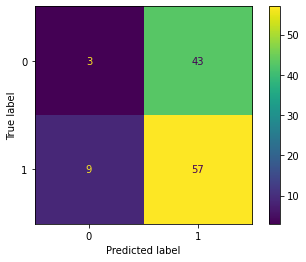

In [458]:
disp.plot()

In [459]:
cm

array([[ 3, 43],
       [ 9, 57]])

In [460]:
ac

0.5357142857142857